## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.692752  0.763924  0.484639 -0.960477  1.488207  0.530163
1 -1.422171  1.094646  1.593638 -0.307735 -0.017632 -0.174654
2  1.220137 -0.588419  1.163635  0.604569 -0.516921  1.051192
3  1.442534  1.027265  0.863413  0.608721 -1.502913 -0.045036
4 -0.740027  1.121561 -0.173927  0.970840 -1.189363  0.184380


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9286487	total: 56.8ms	remaining: 56.7s
1:	learn: 0.9190710	total: 57.4ms	remaining: 28.7s
2:	learn: 0.9100399	total: 58ms	remaining: 19.3s
3:	learn: 0.8997731	total: 58.5ms	remaining: 14.6s
4:	learn: 0.8917954	total: 59.1ms	remaining: 11.8s
5:	learn: 0.8819122	total: 59.6ms	remaining: 9.87s
6:	learn: 0.8724774	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8645539	total: 60.7ms	remaining: 7.53s
8:	learn: 0.8559553	total: 61.2ms	remaining: 6.73s
9:	learn: 0.8489473	total: 61.7ms	remaining: 6.11s
10:	learn: 0.8424506	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8328799	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8232944	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8144732	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8069298	total: 64.4ms	remaining: 4.23s
15:	learn: 0.7992558	total: 64.8ms	remaining: 3.99s
16:	learn: 0.7910793	total: 65.3ms	remaining: 3.78s
17:	learn: 0.7833699	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7766240	total: 66.2ms	remaining: 3.

102:	learn: 0.4003981	total: 107ms	remaining: 931ms
103:	learn: 0.3972232	total: 108ms	remaining: 926ms
104:	learn: 0.3950377	total: 108ms	remaining: 921ms
105:	learn: 0.3922319	total: 109ms	remaining: 916ms
106:	learn: 0.3890773	total: 109ms	remaining: 910ms
107:	learn: 0.3861369	total: 110ms	remaining: 905ms
108:	learn: 0.3836209	total: 110ms	remaining: 900ms
109:	learn: 0.3810132	total: 111ms	remaining: 895ms
110:	learn: 0.3786169	total: 111ms	remaining: 889ms
111:	learn: 0.3760556	total: 112ms	remaining: 884ms
112:	learn: 0.3735135	total: 112ms	remaining: 879ms
113:	learn: 0.3712692	total: 112ms	remaining: 873ms
114:	learn: 0.3685287	total: 113ms	remaining: 868ms
115:	learn: 0.3660489	total: 113ms	remaining: 863ms
116:	learn: 0.3638078	total: 114ms	remaining: 858ms
117:	learn: 0.3615567	total: 114ms	remaining: 852ms
118:	learn: 0.3589164	total: 115ms	remaining: 849ms
119:	learn: 0.3567630	total: 115ms	remaining: 843ms
120:	learn: 0.3544033	total: 115ms	remaining: 838ms
121:	learn: 

267:	learn: 0.1393686	total: 186ms	remaining: 508ms
268:	learn: 0.1384168	total: 187ms	remaining: 507ms
269:	learn: 0.1374638	total: 187ms	remaining: 506ms
270:	learn: 0.1363936	total: 187ms	remaining: 504ms
271:	learn: 0.1354012	total: 188ms	remaining: 503ms
272:	learn: 0.1343519	total: 188ms	remaining: 502ms
273:	learn: 0.1333747	total: 189ms	remaining: 500ms
274:	learn: 0.1324842	total: 189ms	remaining: 499ms
275:	learn: 0.1316419	total: 190ms	remaining: 498ms
276:	learn: 0.1307364	total: 190ms	remaining: 496ms
277:	learn: 0.1298424	total: 191ms	remaining: 495ms
278:	learn: 0.1291379	total: 191ms	remaining: 494ms
279:	learn: 0.1282858	total: 192ms	remaining: 493ms
280:	learn: 0.1276310	total: 192ms	remaining: 491ms
281:	learn: 0.1269540	total: 193ms	remaining: 490ms
282:	learn: 0.1261120	total: 193ms	remaining: 489ms
283:	learn: 0.1253113	total: 194ms	remaining: 488ms
284:	learn: 0.1244657	total: 194ms	remaining: 487ms
285:	learn: 0.1237283	total: 194ms	remaining: 485ms
286:	learn: 

487:	learn: 0.0417736	total: 291ms	remaining: 305ms
488:	learn: 0.0415011	total: 291ms	remaining: 304ms
489:	learn: 0.0413819	total: 292ms	remaining: 304ms
490:	learn: 0.0412896	total: 292ms	remaining: 303ms
491:	learn: 0.0411990	total: 293ms	remaining: 302ms
492:	learn: 0.0410817	total: 293ms	remaining: 301ms
493:	learn: 0.0409586	total: 293ms	remaining: 300ms
494:	learn: 0.0408449	total: 294ms	remaining: 300ms
495:	learn: 0.0406652	total: 294ms	remaining: 299ms
496:	learn: 0.0405545	total: 295ms	remaining: 298ms
497:	learn: 0.0402817	total: 295ms	remaining: 297ms
498:	learn: 0.0401063	total: 295ms	remaining: 297ms
499:	learn: 0.0398717	total: 296ms	remaining: 296ms
500:	learn: 0.0396998	total: 296ms	remaining: 295ms
501:	learn: 0.0396346	total: 297ms	remaining: 294ms
502:	learn: 0.0394686	total: 297ms	remaining: 294ms
503:	learn: 0.0393098	total: 298ms	remaining: 293ms
504:	learn: 0.0391371	total: 298ms	remaining: 292ms
505:	learn: 0.0389558	total: 298ms	remaining: 291ms
506:	learn: 

652:	learn: 0.0232790	total: 370ms	remaining: 196ms
653:	learn: 0.0231610	total: 370ms	remaining: 196ms
654:	learn: 0.0230729	total: 371ms	remaining: 195ms
655:	learn: 0.0230223	total: 371ms	remaining: 195ms
656:	learn: 0.0229359	total: 372ms	remaining: 194ms
657:	learn: 0.0228908	total: 373ms	remaining: 194ms
658:	learn: 0.0227765	total: 373ms	remaining: 193ms
659:	learn: 0.0226825	total: 373ms	remaining: 192ms
660:	learn: 0.0226385	total: 374ms	remaining: 192ms
661:	learn: 0.0225952	total: 374ms	remaining: 191ms
662:	learn: 0.0225034	total: 375ms	remaining: 191ms
663:	learn: 0.0224600	total: 376ms	remaining: 190ms
664:	learn: 0.0223683	total: 377ms	remaining: 190ms
665:	learn: 0.0223258	total: 377ms	remaining: 189ms
666:	learn: 0.0222358	total: 378ms	remaining: 189ms
667:	learn: 0.0221600	total: 378ms	remaining: 188ms
668:	learn: 0.0221184	total: 379ms	remaining: 187ms
669:	learn: 0.0220775	total: 379ms	remaining: 187ms
670:	learn: 0.0220049	total: 380ms	remaining: 186ms
671:	learn: 

860:	learn: 0.0119839	total: 475ms	remaining: 76.7ms
861:	learn: 0.0119477	total: 475ms	remaining: 76.1ms
862:	learn: 0.0119239	total: 476ms	remaining: 75.5ms
863:	learn: 0.0118672	total: 476ms	remaining: 75ms
864:	learn: 0.0118432	total: 477ms	remaining: 74.4ms
865:	learn: 0.0118077	total: 477ms	remaining: 73.8ms
866:	learn: 0.0117816	total: 477ms	remaining: 73.2ms
867:	learn: 0.0117578	total: 478ms	remaining: 72.7ms
868:	learn: 0.0117227	total: 478ms	remaining: 72.1ms
869:	learn: 0.0117026	total: 479ms	remaining: 71.6ms
870:	learn: 0.0116771	total: 479ms	remaining: 71ms
871:	learn: 0.0116523	total: 480ms	remaining: 70.4ms
872:	learn: 0.0116071	total: 480ms	remaining: 69.9ms
873:	learn: 0.0115830	total: 481ms	remaining: 69.3ms
874:	learn: 0.0115513	total: 481ms	remaining: 68.7ms
875:	learn: 0.0115281	total: 482ms	remaining: 68.2ms
876:	learn: 0.0114745	total: 482ms	remaining: 67.6ms
877:	learn: 0.0114224	total: 483ms	remaining: 67.1ms
878:	learn: 0.0113996	total: 483ms	remaining: 66.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

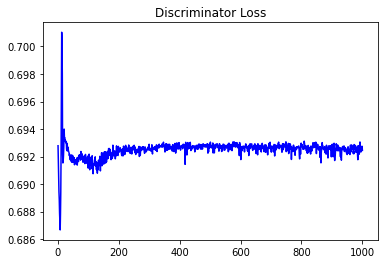

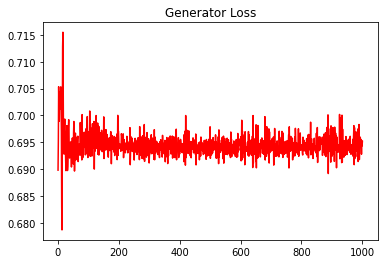

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0743993474639548


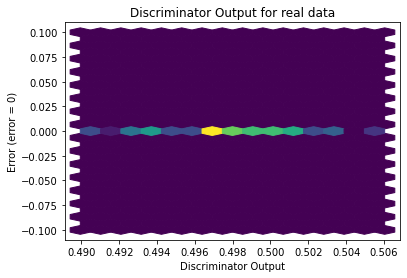

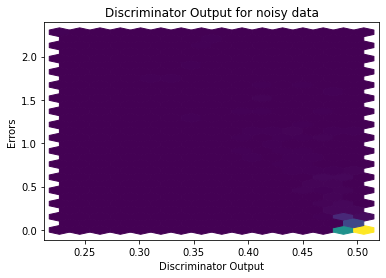

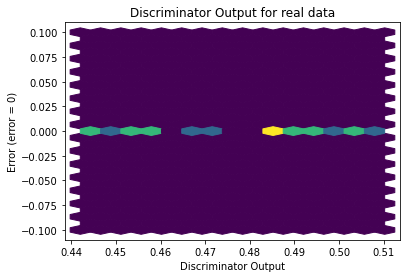

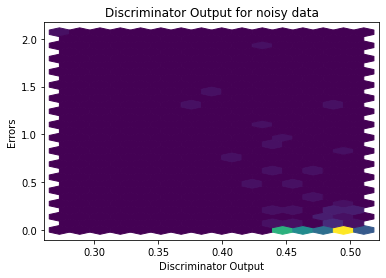

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


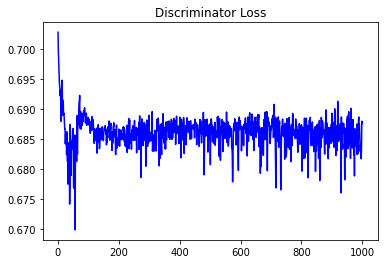

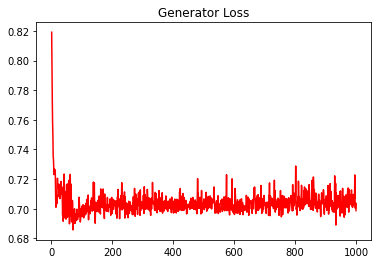

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.053611645060008824


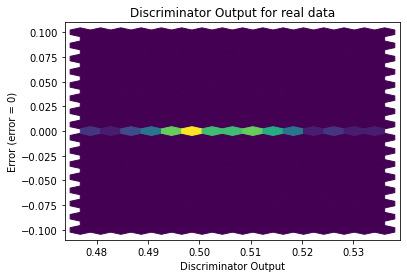

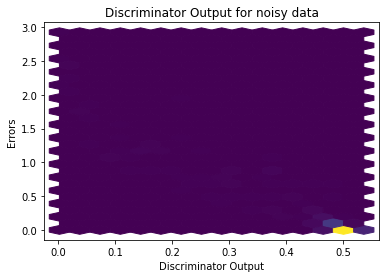

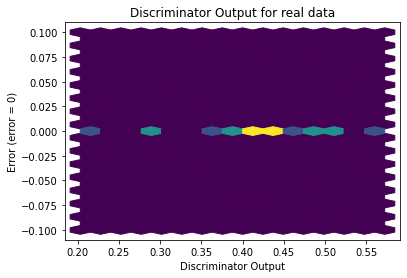

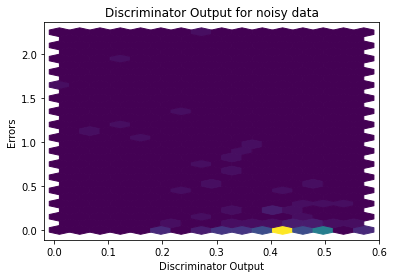

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2062]], requires_grad=True)
